<a href="https://colab.research.google.com/github/shubh199815/FastAI-DL-1/blob/master/Amazon_from_Space_KAGGLE_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
! pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.3)


In [0]:
mkdir shubham\.kaggle

In [0]:
move kaggle.json shubham\.kaggle

SyntaxError: ignored

In [0]:
!mkdir shubham\.kaggle

mkdir: cannot create directory ‘shubham.kaggle’: File exists


In [0]:
!move kaggle.json shubham\.kaggle

/bin/bash: move: command not found


In [0]:
! mkdir -p ~/.kaggle/

In [0]:
! mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [0]:
from google.colab import files
files.upload()

{}

In [0]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [0]:
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          12657  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25           8998  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          11733  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           2247  
vjchoudhary7/customer-segmentation-tutorial-in-python     

In [0]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [0]:
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p {path}
! kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv -p {path}
! unzip -q -n {path}/train_v2.csv.zip -d {path}

100% 598M/600M [00:21<00:00, 27.6MB/s]
100% 600M/600M [00:21<00:00, 28.7MB/s]
  0% 0.00/159k [00:00<?, ?B/s]
100% 159k/159k [00:00<00:00, 61.3MB/s]


In [0]:
! conda install -y -c haasad eidl7zip

/bin/bash: conda: command not found


In [0]:
! 7za -bd -y -so x {path}/train-jpg.tar.7z | tar xf - -C {path.as_posix()}

In [0]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom =1.05, max_warp=0)

In [0]:
np.random.seed(42)
src = ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg').random_split_by_pct(0.2).label_from_df(label_delim=' ')
data = src.transform(tfms, size=128).databunch().normalize(imagenet_stats)

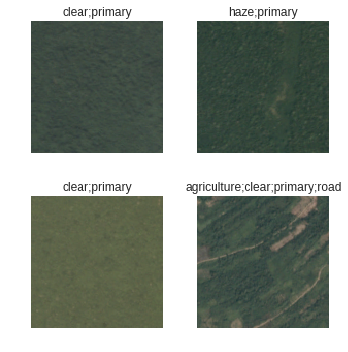

In [0]:
data.show_batch(rows=2, figsize=(5,5))

In [0]:
arch = models.resnet50

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score= partial(fbeta, thresh=0.2)
learn = create_cnn(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 94446852.08it/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


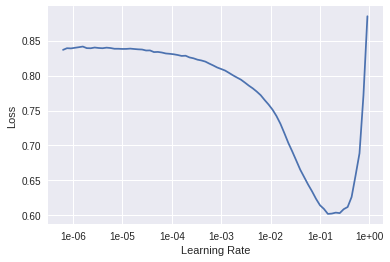

In [0]:
learn.recorder.plot()

In [0]:
lr = 0.01

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
1,0.124938,0.109188,0.946924,0.906162,03:47
2,0.112203,0.098863,0.946241,0.910232,03:43
3,0.096947,0.092380,0.955921,0.920734,03:43
4,0.094981,0.088721,0.959445,0.923573,03:42
5,0.092670,0.086607,0.956182,0.925329,03:39


In [0]:
learn.save('stage-1-256-rn50')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
1,0.097368,0.089379,0.955884,0.923576,04:43
2,0.098911,0.090958,0.955332,0.920694,04:44
3,0.089760,0.085766,0.957846,0.926311,04:41
4,0.084439,0.083596,0.956938,0.927265,04:44
5,0.081354,0.083077,0.959947,0.928518,04:38


In [0]:
learn.save('stage-2-rn50')

In [0]:
data = src.transform(tfms, size=256).databunch().normalize(imagenet_stats)

In [0]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


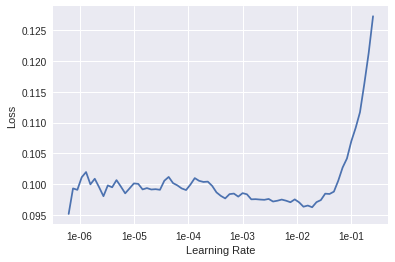

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 1e-2/2

In [0]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
1,0.088500,0.085352,0.957657,0.924240,11:34
2,0.087644,0.085245,0.956168,0.926929,11:31
3,0.087153,0.081486,0.955819,0.929736,11:32
4,0.083012,0.081223,0.960746,0.930503,11:33
5,0.079981,0.080721,0.959089,0.930366,11:32


In [0]:
learn.save('stage-1-rn-256')

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
1,0.085824,0.084592,0.957054,0.927331,15:11
2,0.086241,0.085941,0.956814,0.926841,15:07
3,0.083736,0.086289,0.958573,0.929184,15:08
4,0.078696,0.087090,0.959554,0.930565,15:12
5,0.075029,0.080504,0.959983,0.930795,15:21


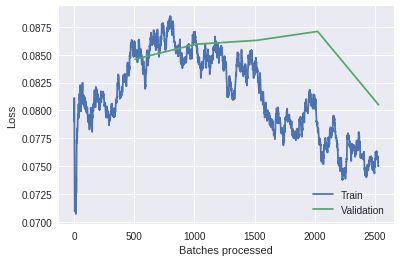

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2-rn50-256')

In [0]:
learn.export()